For each degree of freedom, it plots the probability density function (pdf) of the t-distribution using t.pdf(x, i).

Additionally, it plots the standard normal curve (which is a special case of the t-distribution with infinite degrees of freedom) using norm.pdf(x)

The dashed lines represent the t-distribution curves, and the solid line represents the standard normal curve.

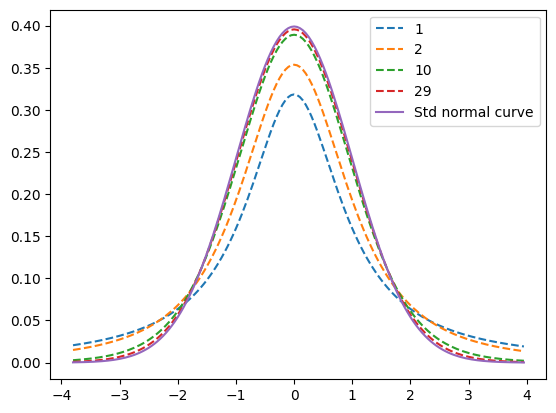

1-cdf gives : 0.12639805893063705
same as     : 0.12639805893063707
0.02275013194817921 0.0227501319481792


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import t, norm
import numpy as np
import pandas as pd

x = np.arange(-3.8,4,1/20)    #a random population
# from -3.8 to 4 with step size 1/20

for i in [1, 2,10, 29]: # few degrees of freedom values
    #plotting all the t-dist curves(pdf gives prob desnity func)
    plt.plot(x, t.pdf(x, i),'--',label=i)

#plotting a regular normal curve
plt.plot(x, norm.pdf(x), label='Std normal curve')
plt.legend(loc = 'upper right')
plt.show()
    
print("1-cdf gives :", 1-t.cdf(1.59, 2))#complementary cumulative distribution function
print('same as     :', t.sf(1.59, 2))#survival function (also known as the complementary cdf)
print(1-norm.cdf(2), norm.sf(2))


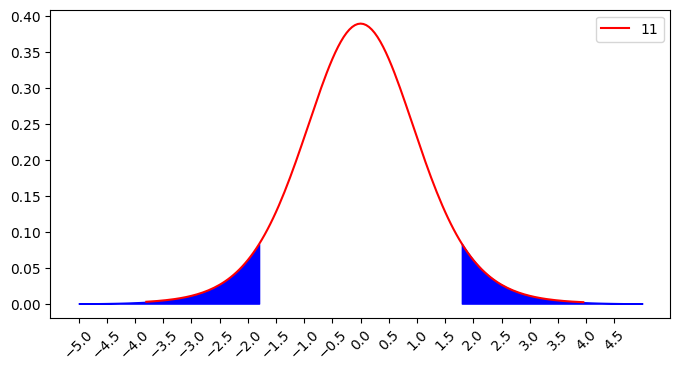

In [2]:
def t_table(n, alpha):
    s = t.ppf(alpha/2, n -1 )#ppf-> inverse of CDF for the t-distribution.
    #calculates the critical value (also known as the quantile) for a two-tailed test.
    plt.figure(figsize=(8,4))#size
    plt.plot(x, t.pdf(x, n - 1), color= 'red',label= n - 1)
    #It plots the probability density function (pdf) of the t-distribution with n - 1 degrees of freedom in red using
    #calculating the area under the graps to  be filled
    section1 = np.arange(-5, s, 1/20.)
    section2 = np.arange(-s, 5, 1/20.)
    #fill those above selected areas
    plt.fill_between(section1, t.pdf(section1, n - 1), color='blue')
    plt.fill_between(section2, t.pdf(section2, n - 1), color='blue')
    plt.xticks(np.arange(-5,5,0.5), rotation = 45)
    plt.legend(loc = 'upper right')
    plt.show()
    
#t_table(sample_size, alpha)
t_table(12, 0.1)



Confidence Level 99.00004355246759


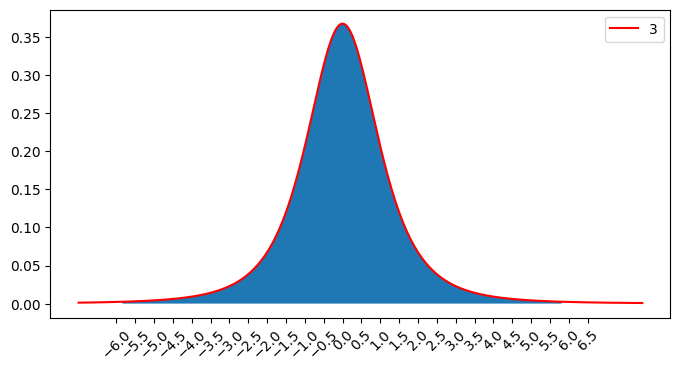

In [3]:
x = np.arange(-7, 8, 1/20)
def ci(t_score, n):
    plt.figure(figsize=(8,4))
    #gives the whole area under the graph
    area = t.cdf(t_score, n - 1) - t.cdf(-t_score, n - 1)
    #calculates the area under the t-distribution curve between -t_score and t_score.
    print('Confidence Level', area * 100)#percentage
    plt.plot(x, t.pdf(x, n - 1), color= 'red',label= n - 1)
    #to fill from -t end to +t end
    section = np.arange(-t_score, t_score, 1/20.)
    #section represents the interval from -t_score to t_score.
    plt.fill_between(section, t.pdf(section, n - 1))
    plt.xticks(np.arange(-6,7,0.5), rotation = 45)
    plt.legend(loc = 'upper right')
    plt.show()
    
ci(5.841, 4)